In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#set the temp_units
temp_units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# List for holding lat_lngs and cities
lat_lngs = []
#Generate Cities List
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs =zip(lats, lngs)


In [3]:
# Identify nearest city for each lat, lng combination

for lat,lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count      
len(cities)

768

In [4]:
# Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={temp_units}&q="

In [5]:
# Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it'sbeing processed (with the city number and city name).
for city in cities:
    response = requests.get(query_url + city).json()

In [9]:
# set lists for the datafrzame

city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | esil
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | ponta delgada
Processing Record 4 of Set 1 | puerto madryn
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | mys shmidta
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | goderich
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | pandharpur
Processing Record 15 of Set 1 | vao
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | ahuimanu
Processing Record 20 of Set 1 | cabedelo
Processing Record 21 of Set 1 | trincomalee
Processing Record 22 of Set 1 | namibe
Processing Record 23 of Set 1 | east london
Processing Record 24 of Set 1 | butaritari
Processing Re

Processing Record 41 of Set 4 | rudbar
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | ondangwa
Processing Record 44 of Set 4 | mbandaka
Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | guanare
City not found. Skipping...
Processing Record 47 of Set 4 | karlovac
Processing Record 48 of Set 4 | kumylzhenskaya
Processing Record 49 of Set 4 | karratha
City not found. Skipping...
Processing Record 1 of Set 5 | saint-jean-port-joli
Processing Record 2 of Set 5 | usinsk
Processing Record 3 of Set 5 | chifeng
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | pilar
Processing Record 7 of Set 5 | fort nelson
Processing Record 8 of Set 5 | kirakira
Processing Record 9 of Set 5 | sao paulo
City not found. Skipping...
City not found. Skipping...
Processing Record 10 of Set 5 | wajir
Processing Record 11

City not found. Skipping...
Processing Record 24 of Set 8 | puerto castilla
Processing Record 25 of Set 8 | alofi
Processing Record 26 of Set 8 | nelson bay
Processing Record 27 of Set 8 | vilyuysk
Processing Record 28 of Set 8 | kutum
Processing Record 29 of Set 8 | aleksandrov gay
Processing Record 30 of Set 8 | gazojak
Processing Record 31 of Set 8 | zhuhai
Processing Record 32 of Set 8 | rubiataba
Processing Record 33 of Set 8 | palmas
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | pangnirtung
City not found. Skipping...
Processing Record 36 of Set 8 | ojinaga
Processing Record 37 of Set 8 | sikonge
Processing Record 38 of Set 8 | alyangula
Processing Record 39 of Set 8 | dudinka
Processing Record 40 of Set 8 | wielun
City not found. Skipping...
Processing Record 41 of Set 8 | dharchula
City not found. Skipping...
Processing Record 42 of Set 8 | igarka
Processing Record 43 of Set 8 | jalu
Processing Record 44 of Set 8 | maceio
Processing Record 45 of Set 8 | 

Processing Record 13 of Set 12 | saravan
City not found. Skipping...
Processing Record 14 of Set 12 | axim
Processing Record 15 of Set 12 | gainesville
Processing Record 16 of Set 12 | williamsport
Processing Record 17 of Set 12 | leshukonskoye
Processing Record 18 of Set 12 | almaznyy
Processing Record 19 of Set 12 | brakel
Processing Record 20 of Set 12 | snezhnogorsk
Processing Record 21 of Set 12 | hokitika
Processing Record 22 of Set 12 | mao
Processing Record 23 of Set 12 | southbridge
Processing Record 24 of Set 12 | muisne
Processing Record 25 of Set 12 | hargeysa
Processing Record 26 of Set 12 | ramhormoz
Processing Record 27 of Set 12 | muroto
Processing Record 28 of Set 12 | vasto
City not found. Skipping...
Processing Record 29 of Set 12 | sioux lookout
Processing Record 30 of Set 12 | canico
Processing Record 31 of Set 12 | caraubas
Processing Record 32 of Set 12 | moerai
Processing Record 33 of Set 12 | howell
Processing Record 34 of Set 12 | sal rei
Processing Record 35 

In [12]:
# Convert Raw Data to DataFrame
df=pd.DataFrame({"City name" : city_two,
                 "Country":countries,
"Cloudiness" : cloudiness,
"Dates" : dates,
"Humidities" :humidities,
"Lats" : lats,
'Lngs' :lngs,
'Max_temps' : max_temps,
"Wind_speeds" :wind_speeds})
df

,City name,Country,Cloudiness,Dates,Humidities,Lats,Lngs,Max_temps,Wind_speeds
0,esil,KZ,0,1594849231,66,51.96,66.40,68.90,8.21
1,hilo,US,90,1594849772,65,19.73,-155.09,82.40,9.17
2,ponta delgada,PT,100,1594849297,90,38.73,-28.27,65.68,8.52
3,puerto madryn,ES,0,1594849297,42,36.59,-6.23,82.40,23.04
4,punta arenas,PH,99,1594849772,87,8.99,125.34,75.18,3.83
...,...,...,...,...,...,...,...,...,...
686,tres arroyos,IT,20,1594849349,77,46.32,11.10,64.40,2.24
687,north mankato,FR,97,1594849349,81,50.33,3.67,62.01,1.99
688,mikkeli,FI,63,1594849296,86,61.69,27.27,55.99,1.01
689,kulhudhuffushi,MV,100,1594849832,78,6.62,73.07,83.68,13.49


In [13]:
#pick only 500 cities 
weather_df=df.iloc[0:500,:]
weather_df

,City name,Country,Cloudiness,Dates,Humidities,Lats,Lngs,Max_temps,Wind_speeds
0,esil,KZ,0,1594849231,66,51.96,66.40,68.90,8.21
1,hilo,US,90,1594849772,65,19.73,-155.09,82.40,9.17
2,ponta delgada,PT,100,1594849297,90,38.73,-28.27,65.68,8.52
3,puerto madryn,ES,0,1594849297,42,36.59,-6.23,82.40,23.04
4,punta arenas,PH,99,1594849772,87,8.99,125.34,75.18,3.83
...,...,...,...,...,...,...,...,...,...
495,saint-georges,GD,20,1594849817,70,12.06,-61.75,86.00,17.22
496,aldan,RU,1,1594849278,71,58.60,125.39,67.23,1.83
497,gornyy,RU,77,1594849279,82,55.12,83.91,52.34,1.90
498,unterageri,CH,90,1594849279,87,47.14,8.59,62.01,1.28


In [14]:
# Output File (CSV)
output_data_file = "Output/weather_df.csv"
# Export the city data into a .csv. Display the DataFrame
weather_df.to_csv(output_data_file )


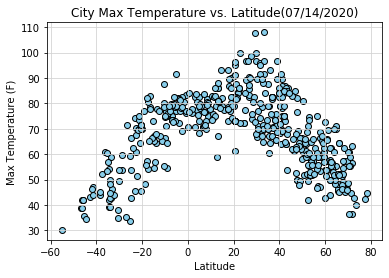

The plot is showing that the closer we get to the EQUATOR the tempratures increase!
It is evident that there is a relationship between the two factors! 


In [15]:
# Plotting the Data

#  Temperature (F) vs. Latitude Plot

plt.scatter(weather_df["Lats"],weather_df["Max_temps"],edgecolors="black",facecolors="skyblue")
plt.title("City Max Temperature vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig1.png")
plt.show()
print(f'The plot is showing that the closer we get to the EQUATOR the tempratures increase!')
print('It is evident that there is a relationship between the two factors! ')

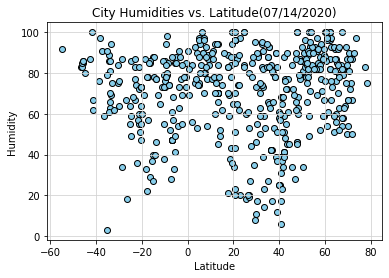

The plot is showing that most cities in the southern Hemisphere are humid whereas in the Northern Hemisphere humidity is variable


In [16]:
#  Humidity (%) vs. Latitude
plt.scatter(weather_df["Lats"],weather_df["Humidities"],edgecolors="black",facecolors="skyblue")
plt.title("City Humidities vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig2.png")
plt.show()
print(f'The plot is showing that most cities in the southern Hemisphere are humid whereas in the Northern Hemisphere humidity is variable')


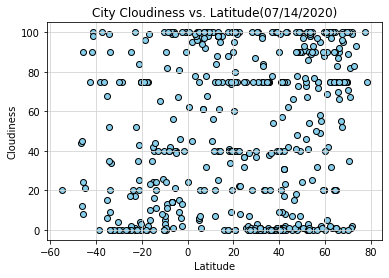

There seems to be no relationship between the two factors! 


In [17]:
#  Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lats"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Cloudiness vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig3.png")
plt.show()

print('There seems to be no relationship between the two factors! ')

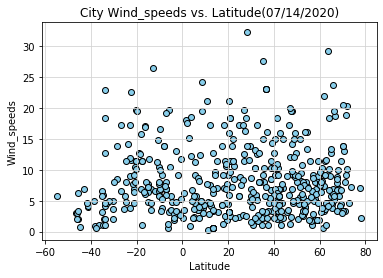

There seems to be no relationship between the two factors! 


In [18]:
#  Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lats"],weather_df["Wind_speeds"],edgecolors="black",facecolors="skyblue")
plt.title("City Wind_speeds vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind_speeds")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig4.png")
plt.show()
print('There seems to be no relationship between the two factors! ')

In [19]:

# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lats"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lats"]).astype(float) < 0, :]


Regression line equation is: y = -0.49x + 89.57
The r-squared is: -0.7008378510361323
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


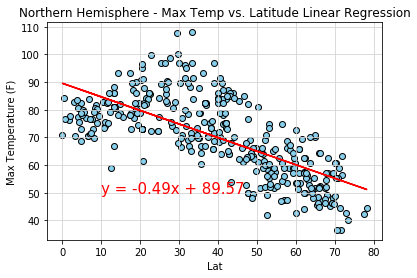

In [20]:

# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Max_temps']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("figures/fig5.png")
plt.show()

Regression line equation is: y = 0.96x + 82.68
The r-squared is: 0.8296588197372323
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


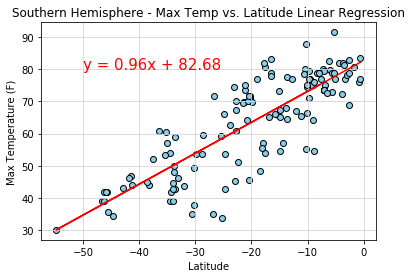

In [21]:

# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Max_temps']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("figures/fig6.png")
plt.show()


Regression line equation is: y = 0.07x + 68.76
The r-squared is: 0.06741698995803709
The regression does not display much of a correlation between the data sets.


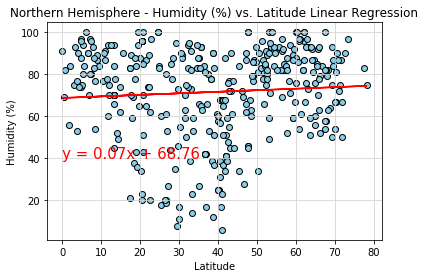

In [22]:

# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Humidities']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("figures/fig7.png")
plt.show()


Regression line equation is: y = -0.25x + 63.88
The r-squared is: -0.17407046696669637
The regression does not display much of a correlation between the data sets.


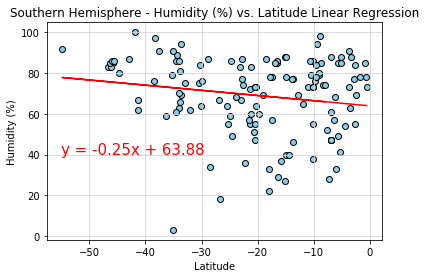

In [23]:

# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Humidities']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig8.png")
plt.show()

Regression line equation is: y = 0.0x + 54.34
The r-squared is: 0.0025056648431223947
The regression does not display much of a correlation between the data sets.


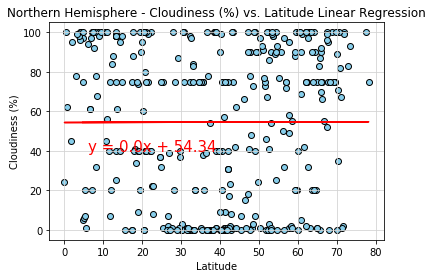

In [24]:

# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig9.png")
plt.show()

Regression line equation is: y = 0.11x + 40.16
The r-squared is: 0.04053327956544377
The regression does not display much of a correlation between the data sets.


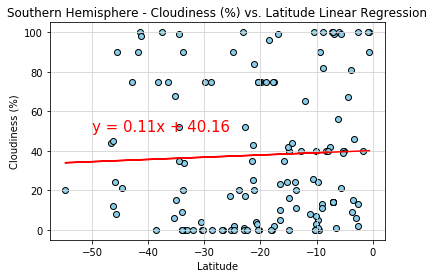

In [25]:

# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig10.png")
plt.show()

Regression line equation is: y = 0.01x + 7.65
The r-squared is: 0.03481821907140922
The regression does not display much of a correlation between the data sets.


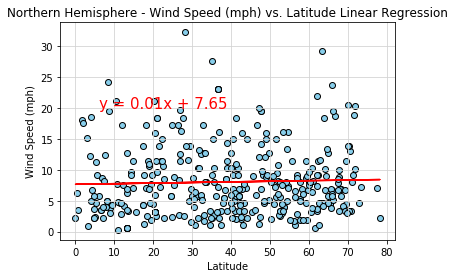

In [26]:

# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Wind_speeds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig11.png")
plt.show()

Regression line equation is: y = 0.06x + 9.03
The r-squared is: 0.15851272225269306
The regression does not display much of a correlation between the data sets.


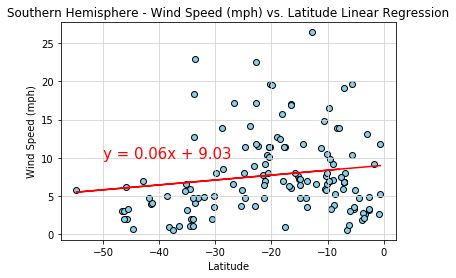

In [27]:

# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Wind_speeds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig12.png")
plt.show()
